<a href="https://colab.research.google.com/github/MHusni1604/Pengantar-Anlisis-Data-Panel/blob/main/Tugas_Minggu_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 3

## Library

In [6]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00


In [17]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import RandomEffects
from scipy import stats


## Load Data


In [8]:
df = pd.read_excel("https://github.com/MHusni1604/Pengantar-Anlisis-Data-Panel/raw/main/Dataset/Panel%20Dataset.xlsx")
df.set_index(['Provinsi ', 'Tahun'], inplace=True)
df.head()

Prevalensi Balita Gizi Kurang (0-59 Bulan)       PDRB  \
Provinsi       Tahun                                                          
ACEH           2016                                        14.11  136843.82   
               2017                                        18.90  145806.92   
               2018                                        16.80  155910.98   
SUMATERA UTARA 2016                                        10.08  626062.91   
               2017                                        13.10  684634.43   

                      Imunisasi Dasar  Presentasi Miskin  Rata Lama Pendidikan  
Provinsi       Tahun                                                            
ACEH           2016             38.15              16.73                  9.36  
               2017             23.19              16.89                  9.42  
               2018             18.32              15.97                  9.46  
SUMATERA UTARA 2016             47.08              10.35                  9.46  
               2017             27.10              10.22                  9.55

## Statistik Deskriptif

In [9]:
df.describe(include='all')

,Prevalensi Balita Gizi Kurang (0-59 Bulan),PDRB,Imunisasi Dasar,Presentasi Miskin,Rata Lama Pendidikan
count,102.000000,1.020000e+02,102.000000,102.000000,102.000000
mean,14.726961,4.053376e+05,53.710392,11.210882,8.713824
std,3.489348,5.791373e+05,16.939769,5.947272,0.866379
min,5.860000,2.915060e+04,18.320000,3.570000,6.480000
25%,12.225000,9.231789e+04,43.180000,6.335000,8.107500
50%,14.050000,1.691676e+05,54.765000,9.390000,8.765000
75%,17.697500,4.184412e+05,65.972500,14.252500,9.347500
max,22.200000,2.592607e+06,92.100000,28.540000,11.060000


<Figure size 1000x600 with 0 Axes>

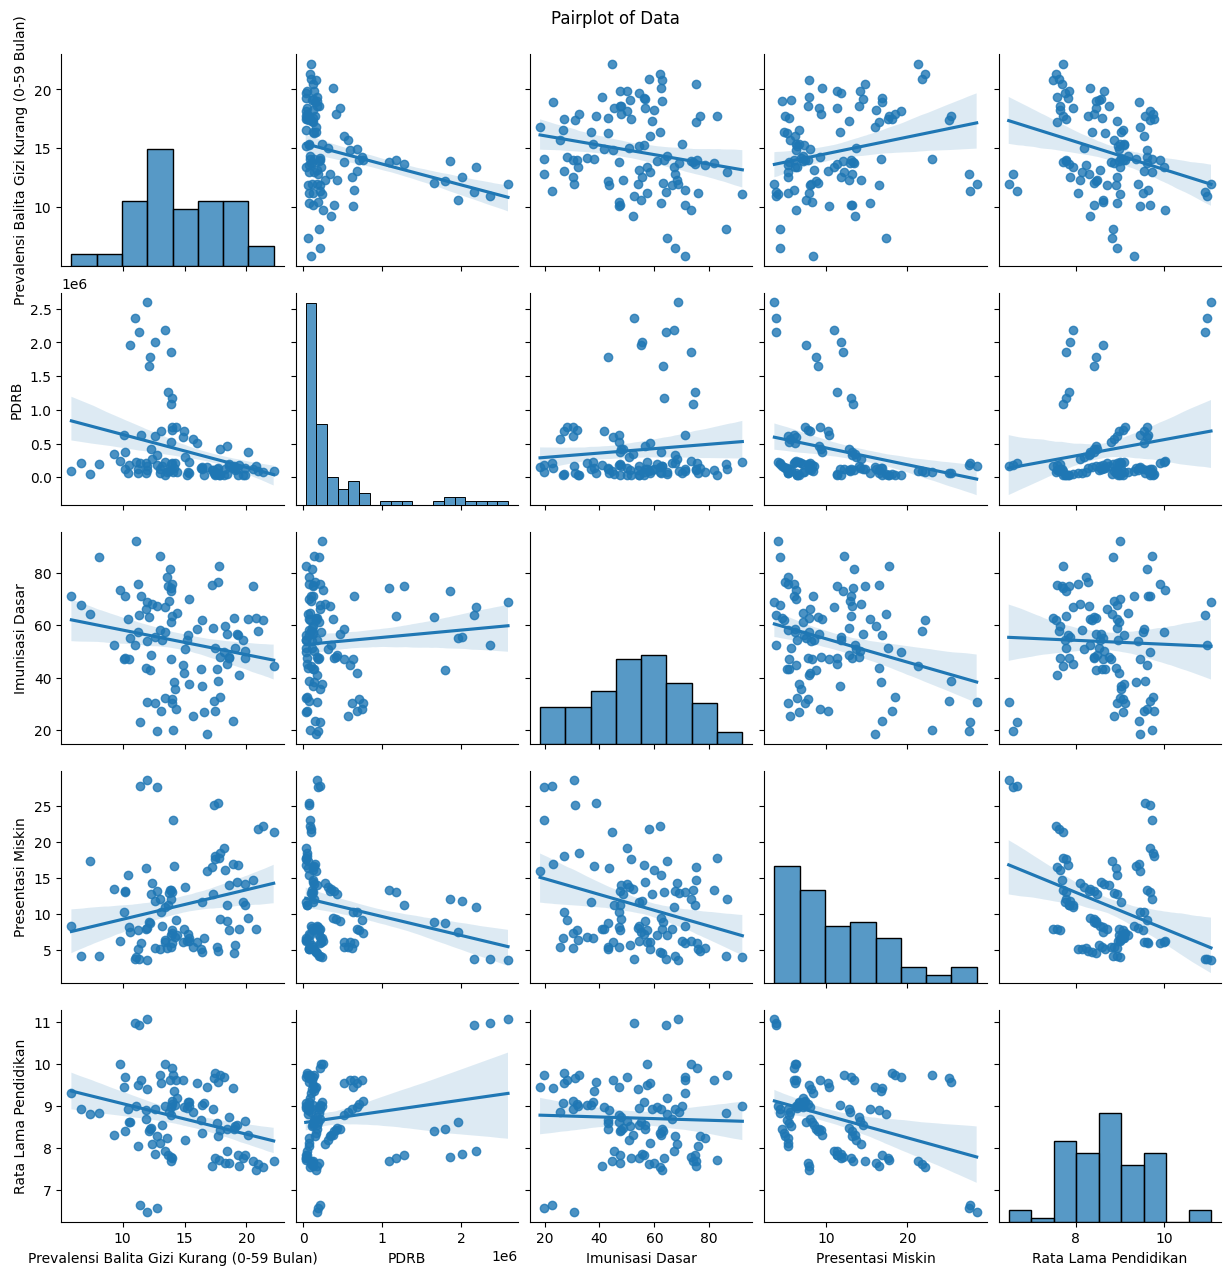

In [10]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, kind='reg')
plt.suptitle('Pairplot of Data', y=1.02)
plt.show()

## Analisis Regresi Panel Efek Random

In [11]:
X = df[['PDRB', 'Imunisasi Dasar', 'Presentasi Miskin', 'Rata Lama Pendidikan',]]
y = df['Prevalensi Balita Gizi Kurang (0-59 Bulan)']

In [14]:
X = sm.add_constant(X)
model = RandomEffects(y, X)
results = model.fit()
print(results)

                                    RandomEffects Estimation Summary                                    
Dep. Variable:     Prevalensi Balita Gizi Kurang (0-59 Bulan)   R-squared:                        0.0812
Estimator:                                      RandomEffects   R-squared (Between):              0.2024
No. Observations:                                         102   R-squared (Within):               0.0145
Date:                                        Thu, Apr 03 2025   R-squared (Overall):              0.1775
Time:                                                18:00:46   Log-likelihood                   -186.63
Cov. Estimator:                                    Unadjusted                                           
                                                                F-statistic:                      2.1431
Entities:                                                  34   P-value                           0.0812
Avg Obs:                                               

## Uji Asumsi

In [18]:
# Uji Hausman
from linearmodels.panel import PanelOLS
model_fixed =  PanelOLS(y, X)
fixed_results = model_fixed.fit()

# Ambil koefisien dan kovarians dari kedua model
beta_fixed = fixed_results.params
beta_random = results.params
cov_matrix_fixed = fixed_results.cov
cov_matrix_random = results.cov

# Hitung statistik uji Hausman
diff = beta_fixed - beta_random
cov_diff = cov_matrix_fixed - cov_matrix_random
hausman_stat = np.dot(np.dot(diff.T, np.linalg.inv(cov_diff)), diff)
df = len(diff)  # Derajat kebebasan (jumlah koefisien)

# Uji p-value menggunakan distribusi Chi-square
p_value = 1 - stats.chi2.cdf(hausman_stat, df)
print(f"Hausman Test Statistic: {hausman_stat}, p-value: {p_value}")

Hausman Test Statistic: 0.17471489788799166, p-value: 0.9993622507474118


In [21]:
# Uji Jarque-Bera
from statsmodels.stats.stattools import jarque_bera
jb_test_stat, jb_p_value, _, _ = jarque_bera(results.resids)
print(f"Jarque-Bera Test Statistic: {jb_test_stat}, p-value: {jb_p_value}")


Jarque-Bera Test Statistic: 10.033695300108459, p-value: 0.006625379338853301


In [22]:
# Uji Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test_stat, bp_p_value, _, _ = het_breuschpagan(results.resids, X)
print(f"Breusch-Pagan Test Statistic: {bp_test_stat}, p-value: {bp_p_value}")

Breusch-Pagan Test Statistic: 7.269297627725083, p-value: 0.12232322089088593


In [29]:
# Uji Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw_test_stat = durbin_watson(results.resids)
print(f"Durbin-Watson Test Statistic: {dw_test_stat}")

Durbin-Watson Test Statistic: 1.745702895399502


In [30]:
# Multicolinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

               Variable         VIF
0                 const  176.217719
1                  PDRB    1.080741
2       Imunisasi Dasar    1.143682
3     Presentasi Miskin    1.362729
4  Rata Lama Pendidikan    1.202381
